In [6]:
# Import Keras Packages
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
# Initializing CNN Layers
model = Sequential()

In [8]:
# First Convolution
# 64 Filters which are 3x3
# Input image sizes are formatted 150x150 and 3 channels (Red, Blue, Green)
# Using ReLU for our activation function
model.add(Conv2D(64, kernel_size=(3, 3), input_shape = (64, 64, 3), activation = 'relu'))

In [9]:
# Max Pooling Layer 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:
# Second Convolution
# 32 Filters which are 3x3
# Input image sizes are formatted 150x150 and 3 channels (Red, Blue, Green)
# Using ReLU for our activation function
#model.add(Conv2D(32, kernel_size=(3, 3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(Conv2D(32, kernel_size=(3, 3), activation = 'relu'))

In [11]:
# Max Pooling Layer 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

In [12]:
model.add(Flatten())

In [13]:
# Fully Connecting Layer
model.add(Dense(128, activation = 'relu'))

# Return a categorical outcome
model.add(Dense(3, activation = 'softmax'))

In [14]:
# Compile the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
# Fitting the CNN to the images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/seg_train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('dataset/seg_test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7057 images belonging to 3 classes.
Found 1509 images belonging to 3 classes.


In [16]:
model.fit_generator(training_set,
                    epochs = 15,
                    validation_data = test_set)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
221/221 [==============================] - 105s 474ms/step - loss: 0.5349 - acc: 0.7481 - val_loss: 0.4499 - val_acc: 0.7939
Epoch 2/15
221/221 [==============================] - 117s 531ms/step - loss: 0.3938 - acc: 0.8311 - val_loss: 0.2913 - val_acc: 0.8847
Epoch 3/15
221/221 [==============================] - 107s 482ms/step - loss: 0.3402 - acc: 0.8607 - val_loss: 0.2445 - val_acc: 0.9059
Epoch 4/15
221/221 [==============================] - 107s 482ms/step - loss: 0.3007 - acc: 0.8834 - val_loss: 0.2315 - val_acc: 0.9119
Epoch 5/15
221/221 [==============================] - 110s 498ms/step - loss: 0.2648 - acc: 0.8992 - val_loss: 0.2824 - val_acc: 0.9032
Epoch 6/15
221/221 [==============================] - 103s 466ms/step - loss: 0.2327 - acc: 0.9121 - val_loss: 0.2284 - val_acc: 0.9079
Epoch 7/15
221/221 [==============================] - 106s 482ms/step - loss: 0.2290 - acc: 0.9102 - val_loss: 0.2251 - val_acc: 0.9198


In [18]:
epoch = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
loss = [0.4499, 0.2913, 0.2445, 0.2315, 0.2824, 0.2284, 0.2251, 0.2159, 0.2305, 0.3264, 0.1819, 0.2213, 0.1911, 0.2521, 0.2406]
accuracies = [0.7939, 0.8847, 0.9059, 0.9119, 0.9032, 0.9079, 0.9198, 0.9172, 0.9211, 0.8774, 0.9370, 0.9271, 0.9324, 0.9125, 0.9245]

Text(0.5, 1.0, 'Accuracies Plot (Custom)')

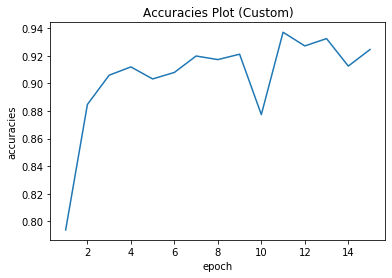

In [19]:
plt.plot(epoch, accuracies)
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.title('Accuracies Plot (Custom)')

Text(0.5, 1.0, 'Loss Plot (Custom)')

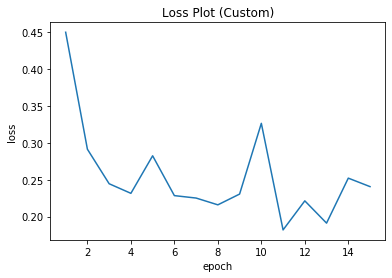

In [20]:
plt.plot(epoch, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss Plot (Custom)')